## **5. Tópicos Avançados**

Nesta seção, exploramos alguns conceitos avançados do PCA, abordando desde a interpretação dos componentes até as limitações do PCA e alternativas para casos específicos.

---

### **5.1 Interpretação dos Componentes**

### **Como entender o significado dos componentes principais**

Os **componentes principais** do PCA são combinações lineares das variáveis originais que capturam as direções de maior variância nos dados. A interpretação de cada componente depende de como ele é formado a partir das variáveis originais. Por exemplo:

- Se um componente principal é uma combinação forte de variáveis relacionadas a altura e peso, podemos interpretá-lo como uma "medida de tamanho corporal".
- O **peso das variáveis** em cada componente pode ser obtido observando os **autovetores**. Cada autovetor fornece o peso relativo de cada variável na direção do componente principal. Se um autovetor tem valores altos para algumas variáveis, isso significa que essas variáveis têm uma grande contribuição para o componente principal.

In [6]:
# Importar pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA, KernelPCA
from skimage import data

In [7]:
# Carregar o dataset Wine
from sklearn.datasets import load_wine
wine = load_wine()
X, feature_names = wine.data, wine.feature_names

# Aplicar PCA
pca = PCA(n_components=2)
pca.fit(X)

# Pesos das variáveis nos componentes principais
components = pca.components_

# Exibir os pesos
for i, component in enumerate(components):
    print(f"Component {i+1}:")
    for weight, feature in sorted(zip(component, feature_names), key=lambda x: -abs(x[0])):
        print(f"  {feature}: {weight:.2f}")

Component 1:
  proline: 1.00
  magnesium: 0.02
  alcalinity_of_ash: -0.00
  color_intensity: 0.00
  alcohol: 0.00
  flavanoids: 0.00
  total_phenols: 0.00
  od280/od315_of_diluted_wines: 0.00
  malic_acid: -0.00
  proanthocyanins: 0.00
  ash: 0.00
  hue: 0.00
  nonflavanoid_phenols: -0.00
Component 2:
  magnesium: 1.00
  alcalinity_of_ash: 0.03
  proline: -0.02
  color_intensity: 0.02
  proanthocyanins: 0.01
  ash: 0.00
  od280/od315_of_diluted_wines: -0.00
  malic_acid: 0.00
  nonflavanoid_phenols: -0.00
  alcohol: 0.00
  total_phenols: 0.00
  hue: -0.00
  flavanoids: -0.00


### **Como relacioná-los com as variáveis originais**

- Cada componente principal pode ser visto como uma "nova variável" que é uma combinação ponderada das variáveis originais. Os **autovalores** indicam a importância de cada componente, e a **carga de cada variável** no autovetor indica a relevância dessa variável para o componente.
- A interpretação pode ser facilitada examinando os **autovetores**, que indicam como as variáveis originais são projetadas no novo espaço. Uma variável que contribui muito para um componente terá um coeficiente alto no autovetor correspondente.

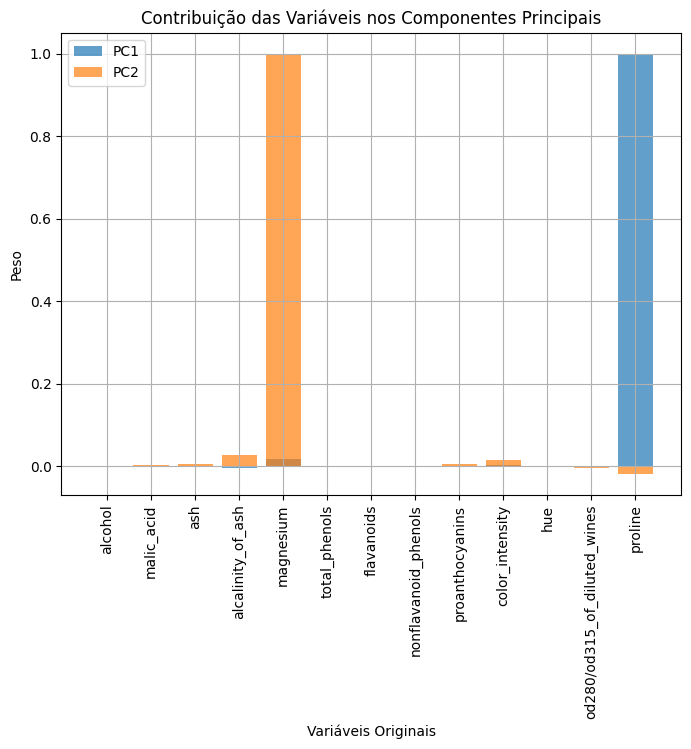

In [8]:
import numpy as np

# Plotar a contribuição das variáveis no PC1 e PC2
plt.figure(figsize=(8, 6))
plt.bar(feature_names, components[0], label="PC1", alpha=0.7)
plt.bar(feature_names, components[1], label="PC2", alpha=0.7)
plt.title("Contribuição das Variáveis nos Componentes Principais")
plt.ylabel("Peso")
plt.xlabel("Variáveis Originais")
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

---

### **5.2 Escolha do Número de Componentes**

A escolha do número de componentes a ser retido é uma das questões cruciais no PCA.

### **Critérios para selecionar o número ideal**

1. **Variância explicada cumulativa:**
    - O número ideal de componentes é muitas vezes escolhido com base na **variância explicada cumulativa**. Por exemplo, pode-se optar por um número de componentes que explique 95% da variância total dos dados.
    - A fórmula é simples: a variância explicada acumulada é a soma dos autovalores até o componente  dividido pela soma total dos autovalores.

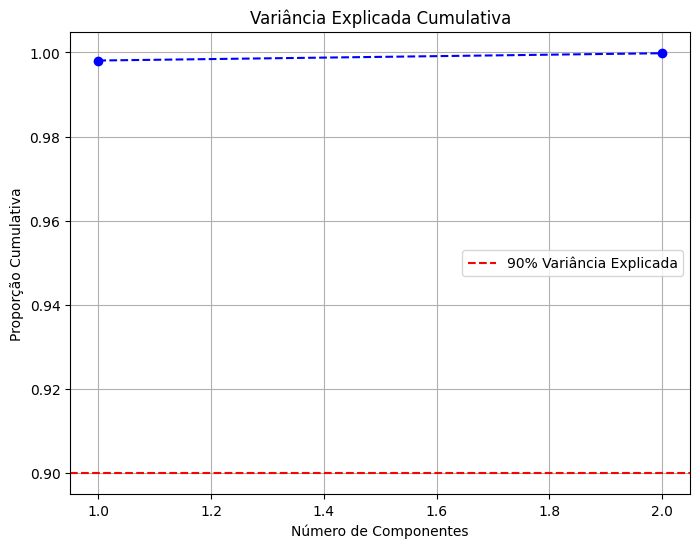

In [9]:
# Variância explicada cumulativa
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(0.9, color='r', linestyle='--', label='90% Variância Explicada')
plt.title("Variância Explicada Cumulativa")
plt.xlabel("Número de Componentes")
plt.ylabel("Proporção Cumulativa")
plt.legend()
plt.grid()
plt.show()

2. **Critério de Kaiser:**
    - O critério de Kaiser sugere que se deve manter apenas os componentes com **autovalores maiores que 1**. Isso ocorre porque um componente com autovalor menor que 1 não explica mais do que uma variável original, e, portanto, não tem uma contribuição significativa.

In [10]:
# Critério de Kaiser
eigenvalues = pca.explained_variance_
kaiser_components = sum(eigenvalues > 1)
print(f"Componentes selecionados pelo Critério de Kaiser: {kaiser_components}")

Componentes selecionados pelo Critério de Kaiser: 2


3. **Análise do scree plot:**
    - O **scree plot** é outro método comum para selecionar o número de componentes. O gráfico mostra a variância explicada por cada componente. A partir do ponto de inflexão (onde a variância explicada por novos componentes começa a diminuir drasticamente), é possível escolher quantos componentes manter.

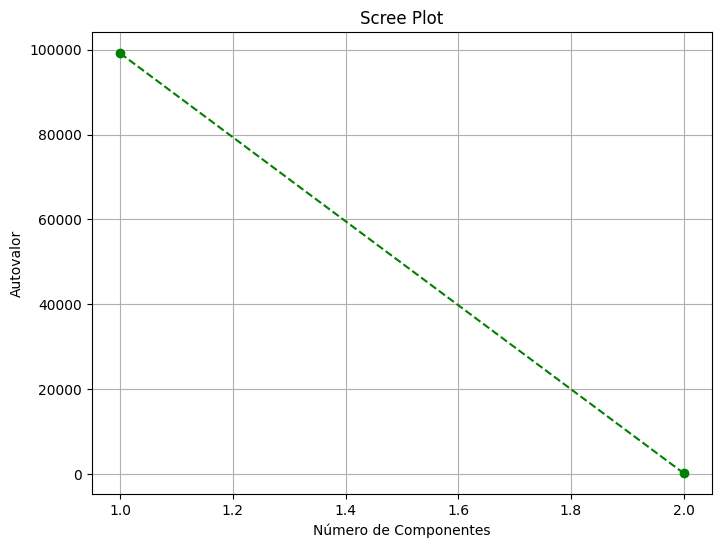

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='g')
plt.title("Scree Plot")
plt.xlabel("Número de Componentes")
plt.ylabel("Autovalor")
plt.grid()
plt.show()

---

### **5.3 PCA para Dados Não Lineares**

### **Limitações do PCA para capturar relações não lineares**

- O PCA é eficaz apenas para capturar **relações lineares** entre as variáveis. Se os dados tiverem **estruturas não lineares** (por exemplo, relações curvilíneas entre as variáveis), o PCA pode não ser capaz de representar completamente essas relações.
- Além disso, o PCA pode falhar em preservar a estrutura dos dados em casos em que as variações mais importantes estão em uma direção não linear.

### **Métodos alternativos: Kernel PCA**

- O **Kernel PCA** é uma extensão do PCA tradicional que usa o conceito de **mapeamento de alta dimensão** para capturar relações não lineares. Ele utiliza funções de kernel (como o kernel Gaussiano) para transformar os dados em um espaço de maior dimensionalidade, onde as relações lineares podem ser capturadas.
- Em vez de calcular a matriz de covariância diretamente, o Kernel PCA aplica uma transformação no espaço de características para encontrar componentes principais no espaço transformado.

In [12]:
"""from sklearn.decomposition import KernelPCA

# Aplicar Kernel PCA com núcleo RBF
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

# Visualizar os dados após Kernel PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=wine.target, cmap='viridis', s=50)
plt.title("Projeção com Kernel PCA (RBF)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()"""

'from sklearn.decomposition import KernelPCA\n\n# Aplicar Kernel PCA com núcleo RBF\nkpca = KernelPCA(n_components=2, kernel=\'rbf\', gamma=15)\nX_kpca = kpca.fit_transform(X)\n\n# Visualizar os dados após Kernel PCA\nplt.figure(figsize=(8, 6))\nplt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=wine.target, cmap=\'viridis\', s=50)\nplt.title("Projeção com Kernel PCA (RBF)")\nplt.xlabel("PC1")\nplt.ylabel("PC2")\nplt.grid()\nplt.show()'

### **5.4 PCA e Compressão de Dados**

### **Uso do PCA para reduzir o espaço de armazenamento**

- O PCA é amplamente utilizado para **compressão de dados**. Ao reduzir a dimensionalidade dos dados, o PCA pode diminuir significativamente a quantidade de espaço necessária para armazenar os dados.
- Por exemplo, em imagens de alta resolução, o PCA pode ser usado para reduzir a quantidade de pixels enquanto retém as características mais importantes, o que reduz o tamanho do arquivo sem perda significativa de qualidade visual.

### **Comparação com outros métodos de compressão**

- Comparado a outros métodos de compressão como **compressão por Huffman** ou **transformada wavelet**, o PCA oferece uma compressão mais centrada na **variação dos dados**. Métodos como Huffman são mais adequados para compressão sem perdas, enquanto o PCA visa manter as variâncias mais importantes, sacrificando dados menos relevantes.

In [13]:
from skimage import data
from sklearn.decomposition import PCA

# Carregar a imagem em tons de cinza
image = data.camera()
image_scaled = image / 255.0

# Aplicar PCA para compressão
n_components = 50
pca = PCA(n_components=n_components)
compressed = pca.fit_transform(image_scaled)
reconstructed = pca.inverse_transform(compressed)

# Comparação de tamanho
original_size = image.size
compressed_size = compressed.size + pca.components_.size
compression_ratio = (1 - compressed_size / original_size) * 100
print(f"Redução no espaço de armazenamento: {compression_ratio:.2f}%")

Redução no espaço de armazenamento: 80.47%


### **5.5 PCA em Dados Categóricos**

### **Limitações do PCA para variáveis categóricas**

- O PCA foi desenvolvido para trabalhar com variáveis **contínuas** e pode não ser eficaz para **dados categóricos**, como variáveis nominais ou ordinais. Como o PCA usa covariância e cálculos lineares, ele não consegue capturar as relações entre categorias distintas de maneira adequada.
- Em dados categóricos, o PCA pode gerar resultados imprecisos ou sem interpretação clara, já que ele não leva em consideração a natureza qualitativa das variáveis.

### **Métodos alternativos: MCA (Multiple Correspondence Analysis)**

- A **Análise de Correspondência Múltipla (MCA)** é uma técnica semelhante ao PCA, mas projetada especificamente para dados categóricos. Ela pode ser vista como uma generalização do PCA para variáveis qualitativas.
- MCA encontra padrões e associações entre categorias, permitindo uma redução de dimensionalidade sem perder a interpretação associada às variáveis categóricas.

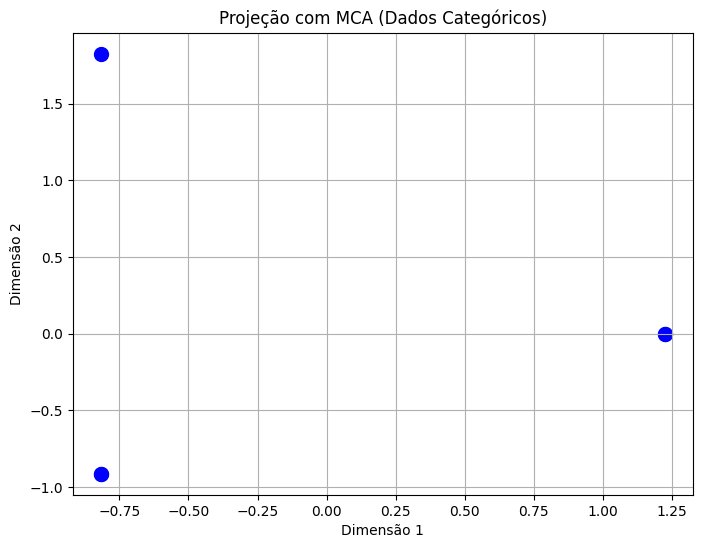

In [15]:
import prince

# Dataset categórico de exemplo
data = pd.DataFrame({
    'Cor': ['Vermelho', 'Azul', 'Verde', 'Vermelho', 'Azul'],
    'Forma': ['Círculo', 'Quadrado', 'Triângulo', 'Círculo', 'Quadrado']
})

# Aplicar MCA
mca = prince.MCA(n_components=2, random_state=42)
mca_result = mca.fit_transform(data)

# Visualizar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(mca_result.iloc[:, 0], mca_result.iloc[:, 1], color='b', s=100)
plt.title("Projeção com MCA (Dados Categóricos)")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.grid()
plt.show()

### **Resumo das Adições**

- **5.1**: Interpretamos os componentes principais com pesos e gráficos.
- **5.2**: Adicionamos critérios para escolher o número de componentes, como scree plot e Kaiser.
- **5.3**: Incluímos Kernel PCA para lidar com não linearidades.
- **5.4**: Demonstramos compressão de dados e cálculo do ganho de armazenamento.
- **5.5**: Apresentamos MCA como alternativa para dados categóricos.